In [50]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
ath = pd.read_csv('attributeDifferences.csv')
ath.drop(['Unnamed: 0'], axis=1, inplace=True)
ath.head()

,sexFirst,sportFirst,eventFirst,heightDiff,weightDiff,ageDiff
0,M,Athletics,Athletics Men's Shot Put,13.0,44.0,3.0
1,M,Athletics,Athletics Men's 400 metres,0.0,14.0,6.0
2,M,Athletics,Athletics Men's Discus Throw,3.0,23.0,2.0
3,M,Athletics,Athletics Men's Long Jump,10.0,3.0,-9.0
4,M,Athletics,Athletics Men's High Jump,3.0,0.0,12.0


In [52]:
female = ath[~ath.sexFirst.str.contains("M")]
male = ath[~ath.sexFirst.str.contains("F")]

In [53]:
topHeightMale = male.nlargest(10, ['heightDiff'])
topHeightFemale = female.nlargest(10, ['heightDiff'])

In [54]:
bottomHeightMale = male.nsmallest(10, ['heightDiff'])
bottomHeightFemale = female.nsmallest(10, ['heightDiff'])

In [55]:
topWeightMale = male.nlargest(10, ['weightDiff'])
topWeightFemale = female.nlargest(10, ['weightDiff'])
bottomWeightMale = male.nsmallest(10, ['weightDiff'])
bottomWeightFemale = female.nsmallest(10, ['weightDiff'])

# Which events have had the biggest change in the athletes attributes from when they were first included in the Olympics, to the most recent running of that event?

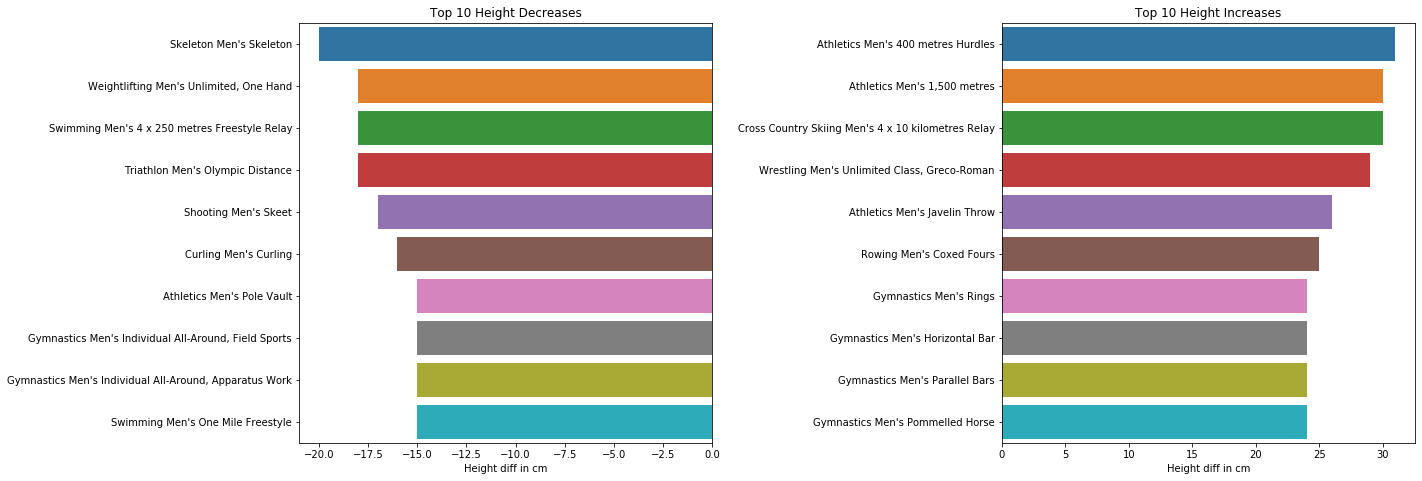

In [56]:
fig = plt.figure(figsize=(20,17))

plt.subplot(222)
ax = sns.barplot(y = topHeightMale['eventFirst'], x=topHeightMale['heightDiff'])
plt.title("Top 10 Height Increases")
plt.xlabel("Height diff in cm")
plt.ylabel("")

plt.subplot(221)
ax2 = sns.barplot(y = bottomHeightMale['eventFirst'], x=bottomHeightMale['heightDiff'])
plt.title("Top 10 Height Decreases")
plt.xlabel("Height diff in cm")
plt.ylabel("")

plt.subplots_adjust(wspace = .7)
plt.show()

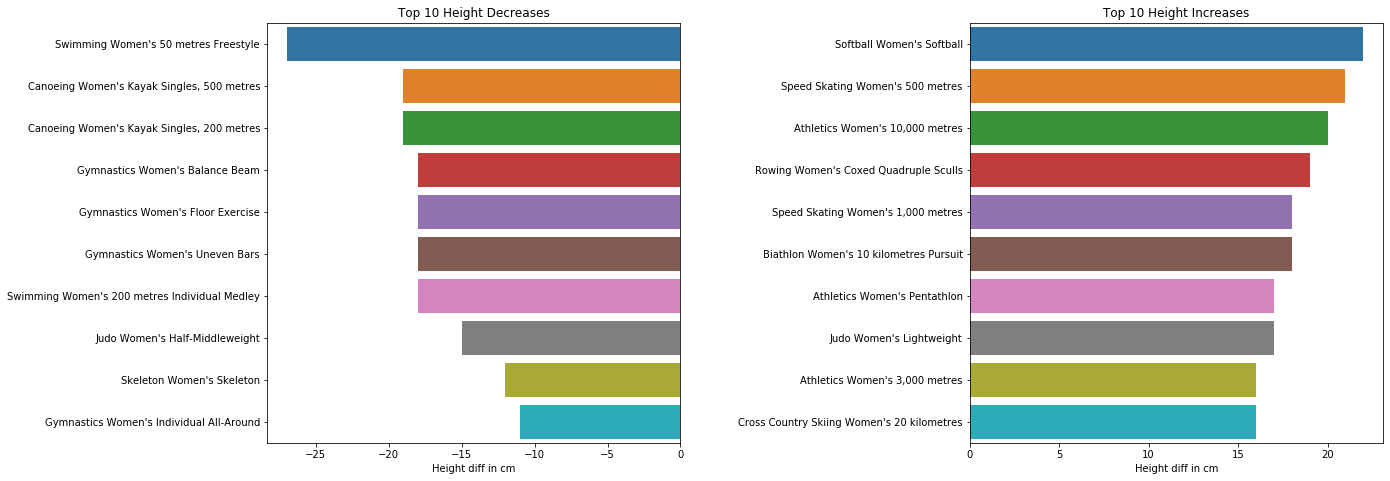

In [57]:
fig = plt.figure(figsize=(20,17))

plt.subplot(222)
ax = sns.barplot(y = topHeightFemale['eventFirst'], x=topHeightFemale['heightDiff'])
plt.title("Top 10 Height Increases")
plt.xlabel("Height diff in cm")
plt.ylabel("")

plt.subplot(221)
ax2 = sns.barplot(y = bottomHeightFemale['eventFirst'], x=bottomHeightFemale['heightDiff'])
plt.title("Top 10 Height Decreases")
plt.xlabel("Height diff in cm")
plt.ylabel("")

plt.subplots_adjust(wspace = .7)
plt.show()

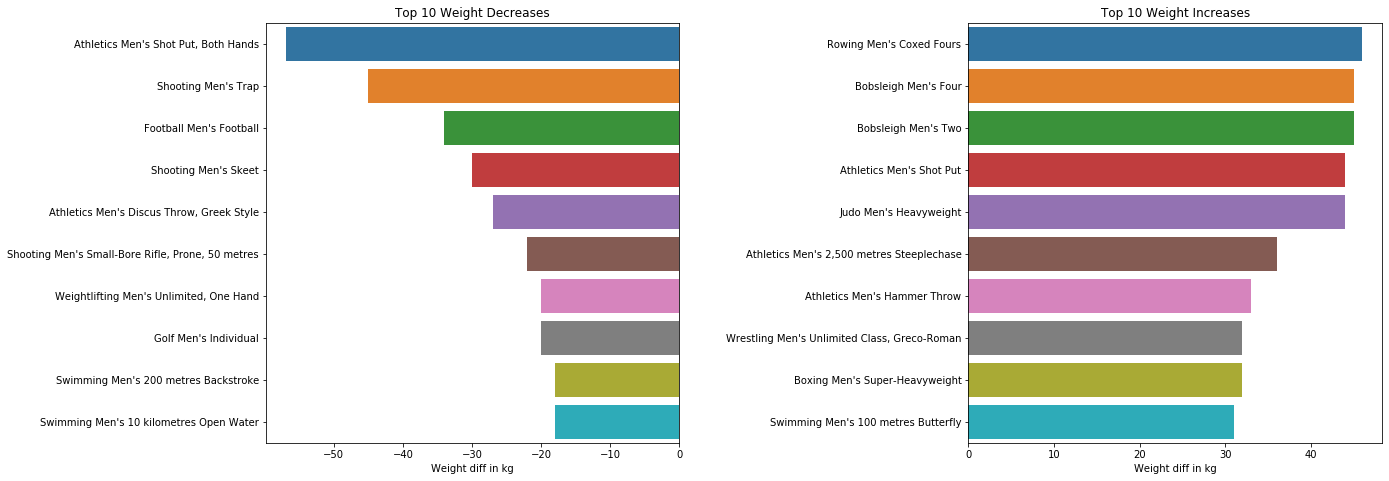

In [58]:
fig = plt.figure(figsize=(20,17))

plt.subplot(222)
ax = sns.barplot(y = topWeightMale['eventFirst'], x=topWeightMale['weightDiff'])
plt.title("Top 10 Weight Increases")
plt.xlabel("Weight diff in kg")
plt.ylabel("")

plt.subplot(221)
ax2 = sns.barplot(y = bottomWeightMale['eventFirst'], x=bottomWeightMale['weightDiff'])
plt.title("Top 10 Weight Decreases")
plt.xlabel("Weight diff in kg")
plt.ylabel("")

plt.subplots_adjust(wspace = .7)
plt.show()

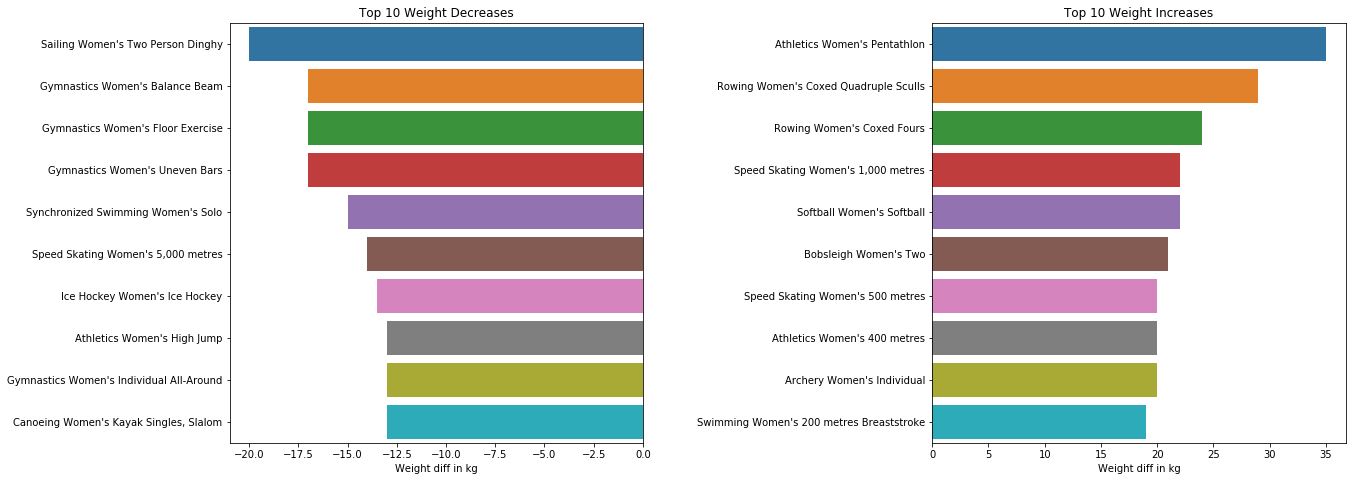

In [59]:
fig = plt.figure(figsize=(20,17))

plt.subplot(222)
ax = sns.barplot(y = topWeightFemale['eventFirst'], x=topWeightFemale['weightDiff'])
plt.title("Top 10 Weight Increases")
plt.xlabel("Weight diff in kg")
plt.ylabel("")

plt.subplot(221)
ax2 = sns.barplot(y = bottomWeightFemale['eventFirst'], x=bottomWeightFemale['weightDiff'])
plt.title("Top 10 Weight Decreases")
plt.xlabel("Weight diff in kg")
plt.ylabel("")

plt.subplots_adjust(wspace = .7)
plt.show()